# **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.shape

(6607, 20)

# **Check if the data contain NULL Values or Not**

In [5]:
df.isnull().sum().sum()

np.int64(235)

In [6]:
df.Teacher_Quality.unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [7]:
df.Parental_Education_Level.unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [8]:
df.Distance_from_Home.unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [9]:
#Drop nan values
df = df.dropna(axis=0)

In [10]:
df.isnull().sum().sum()

np.int64(0)

# **Check if there is Outliers or not**

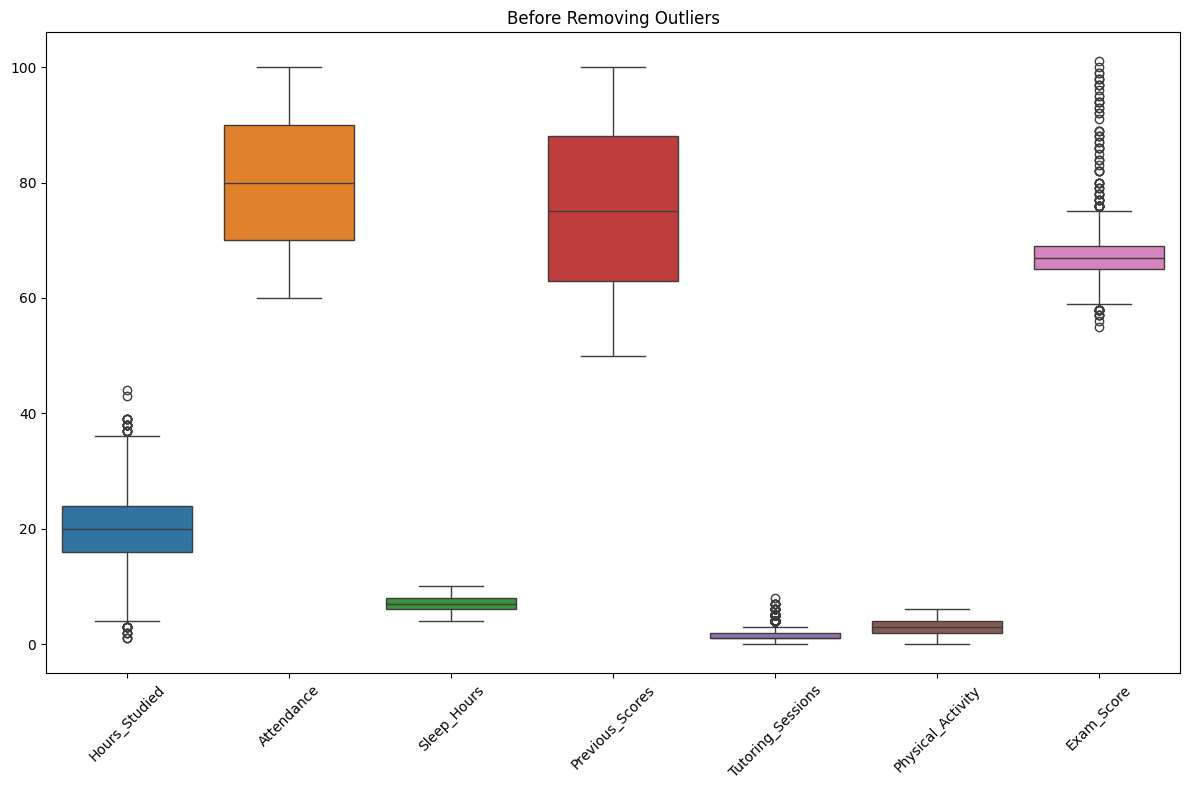

In [12]:
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")

Outliers removed from Hours_Studied
Outliers removed from Attendance
Outliers removed from Sleep_Hours
Outliers removed from Previous_Scores
Outliers removed from Tutoring_Sessions
Outliers removed from Physical_Activity
Outliers removed from Exam_Score


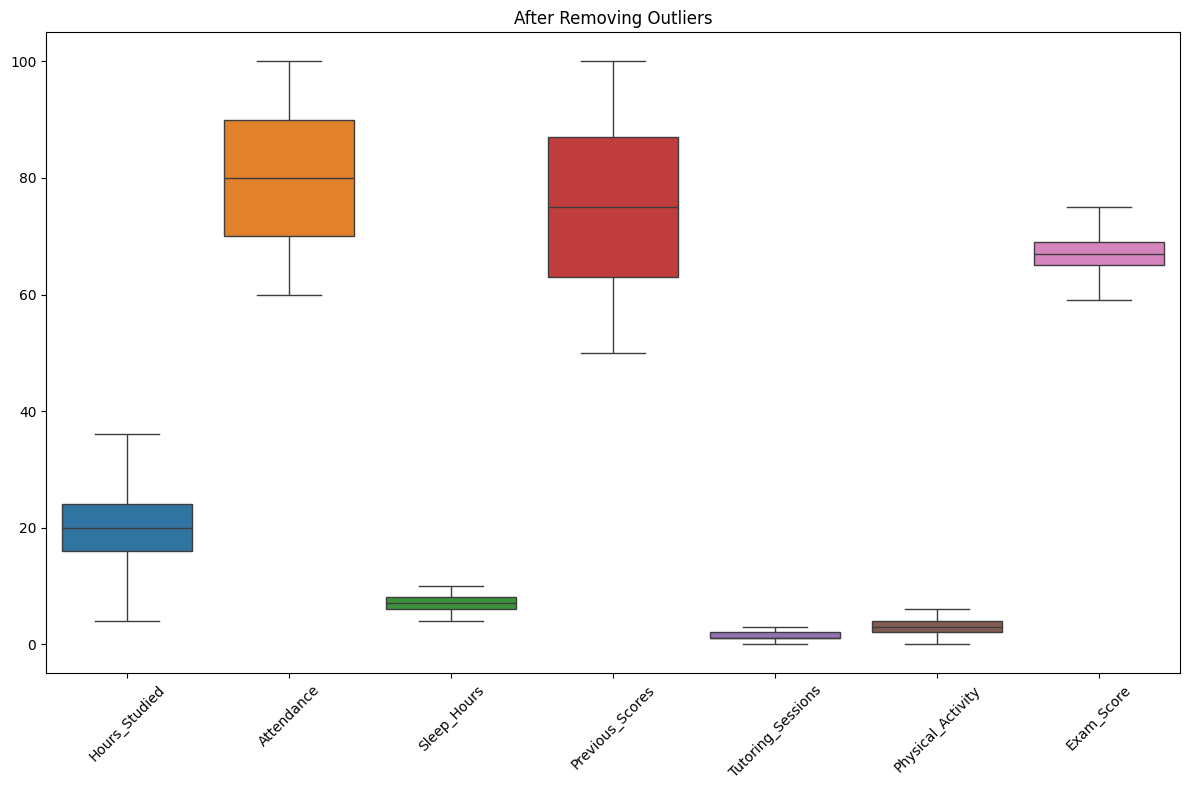

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title("After Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Some Basic Visualization**

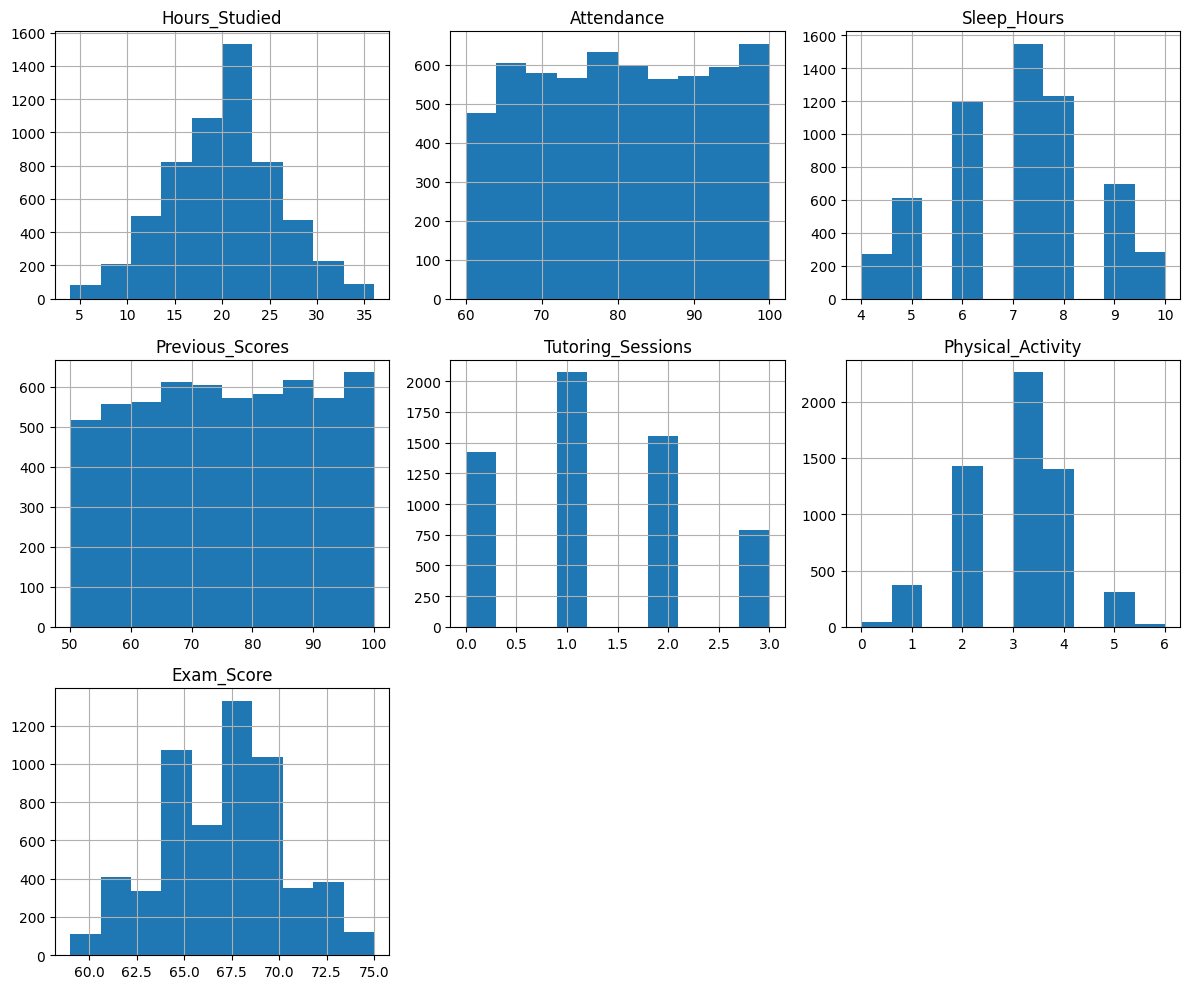

In [15]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

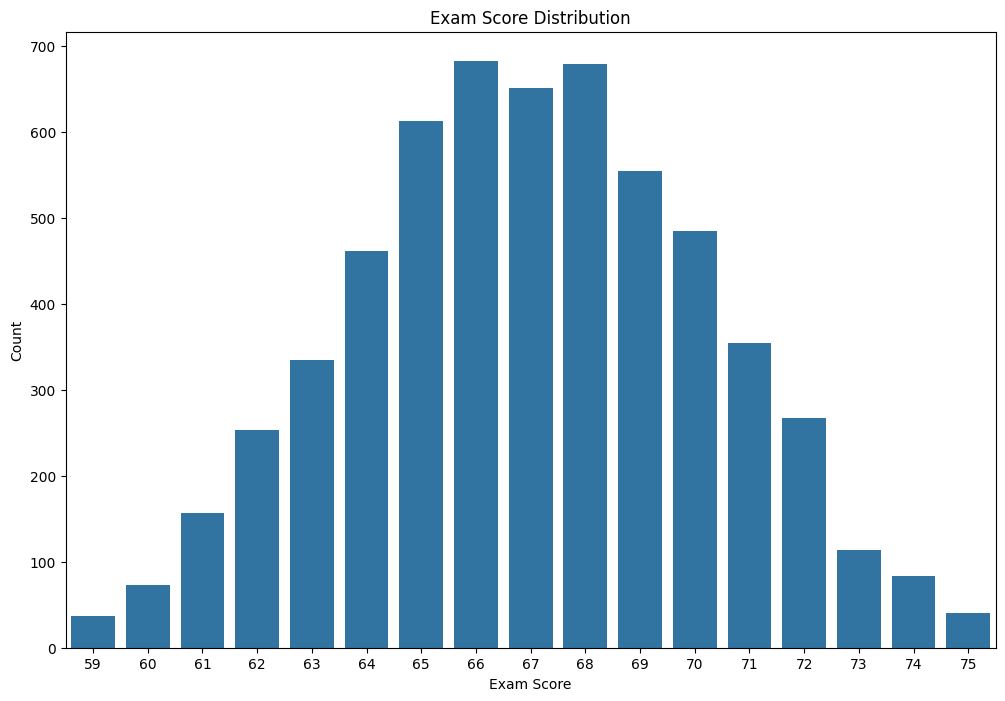

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Exam_Score')
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

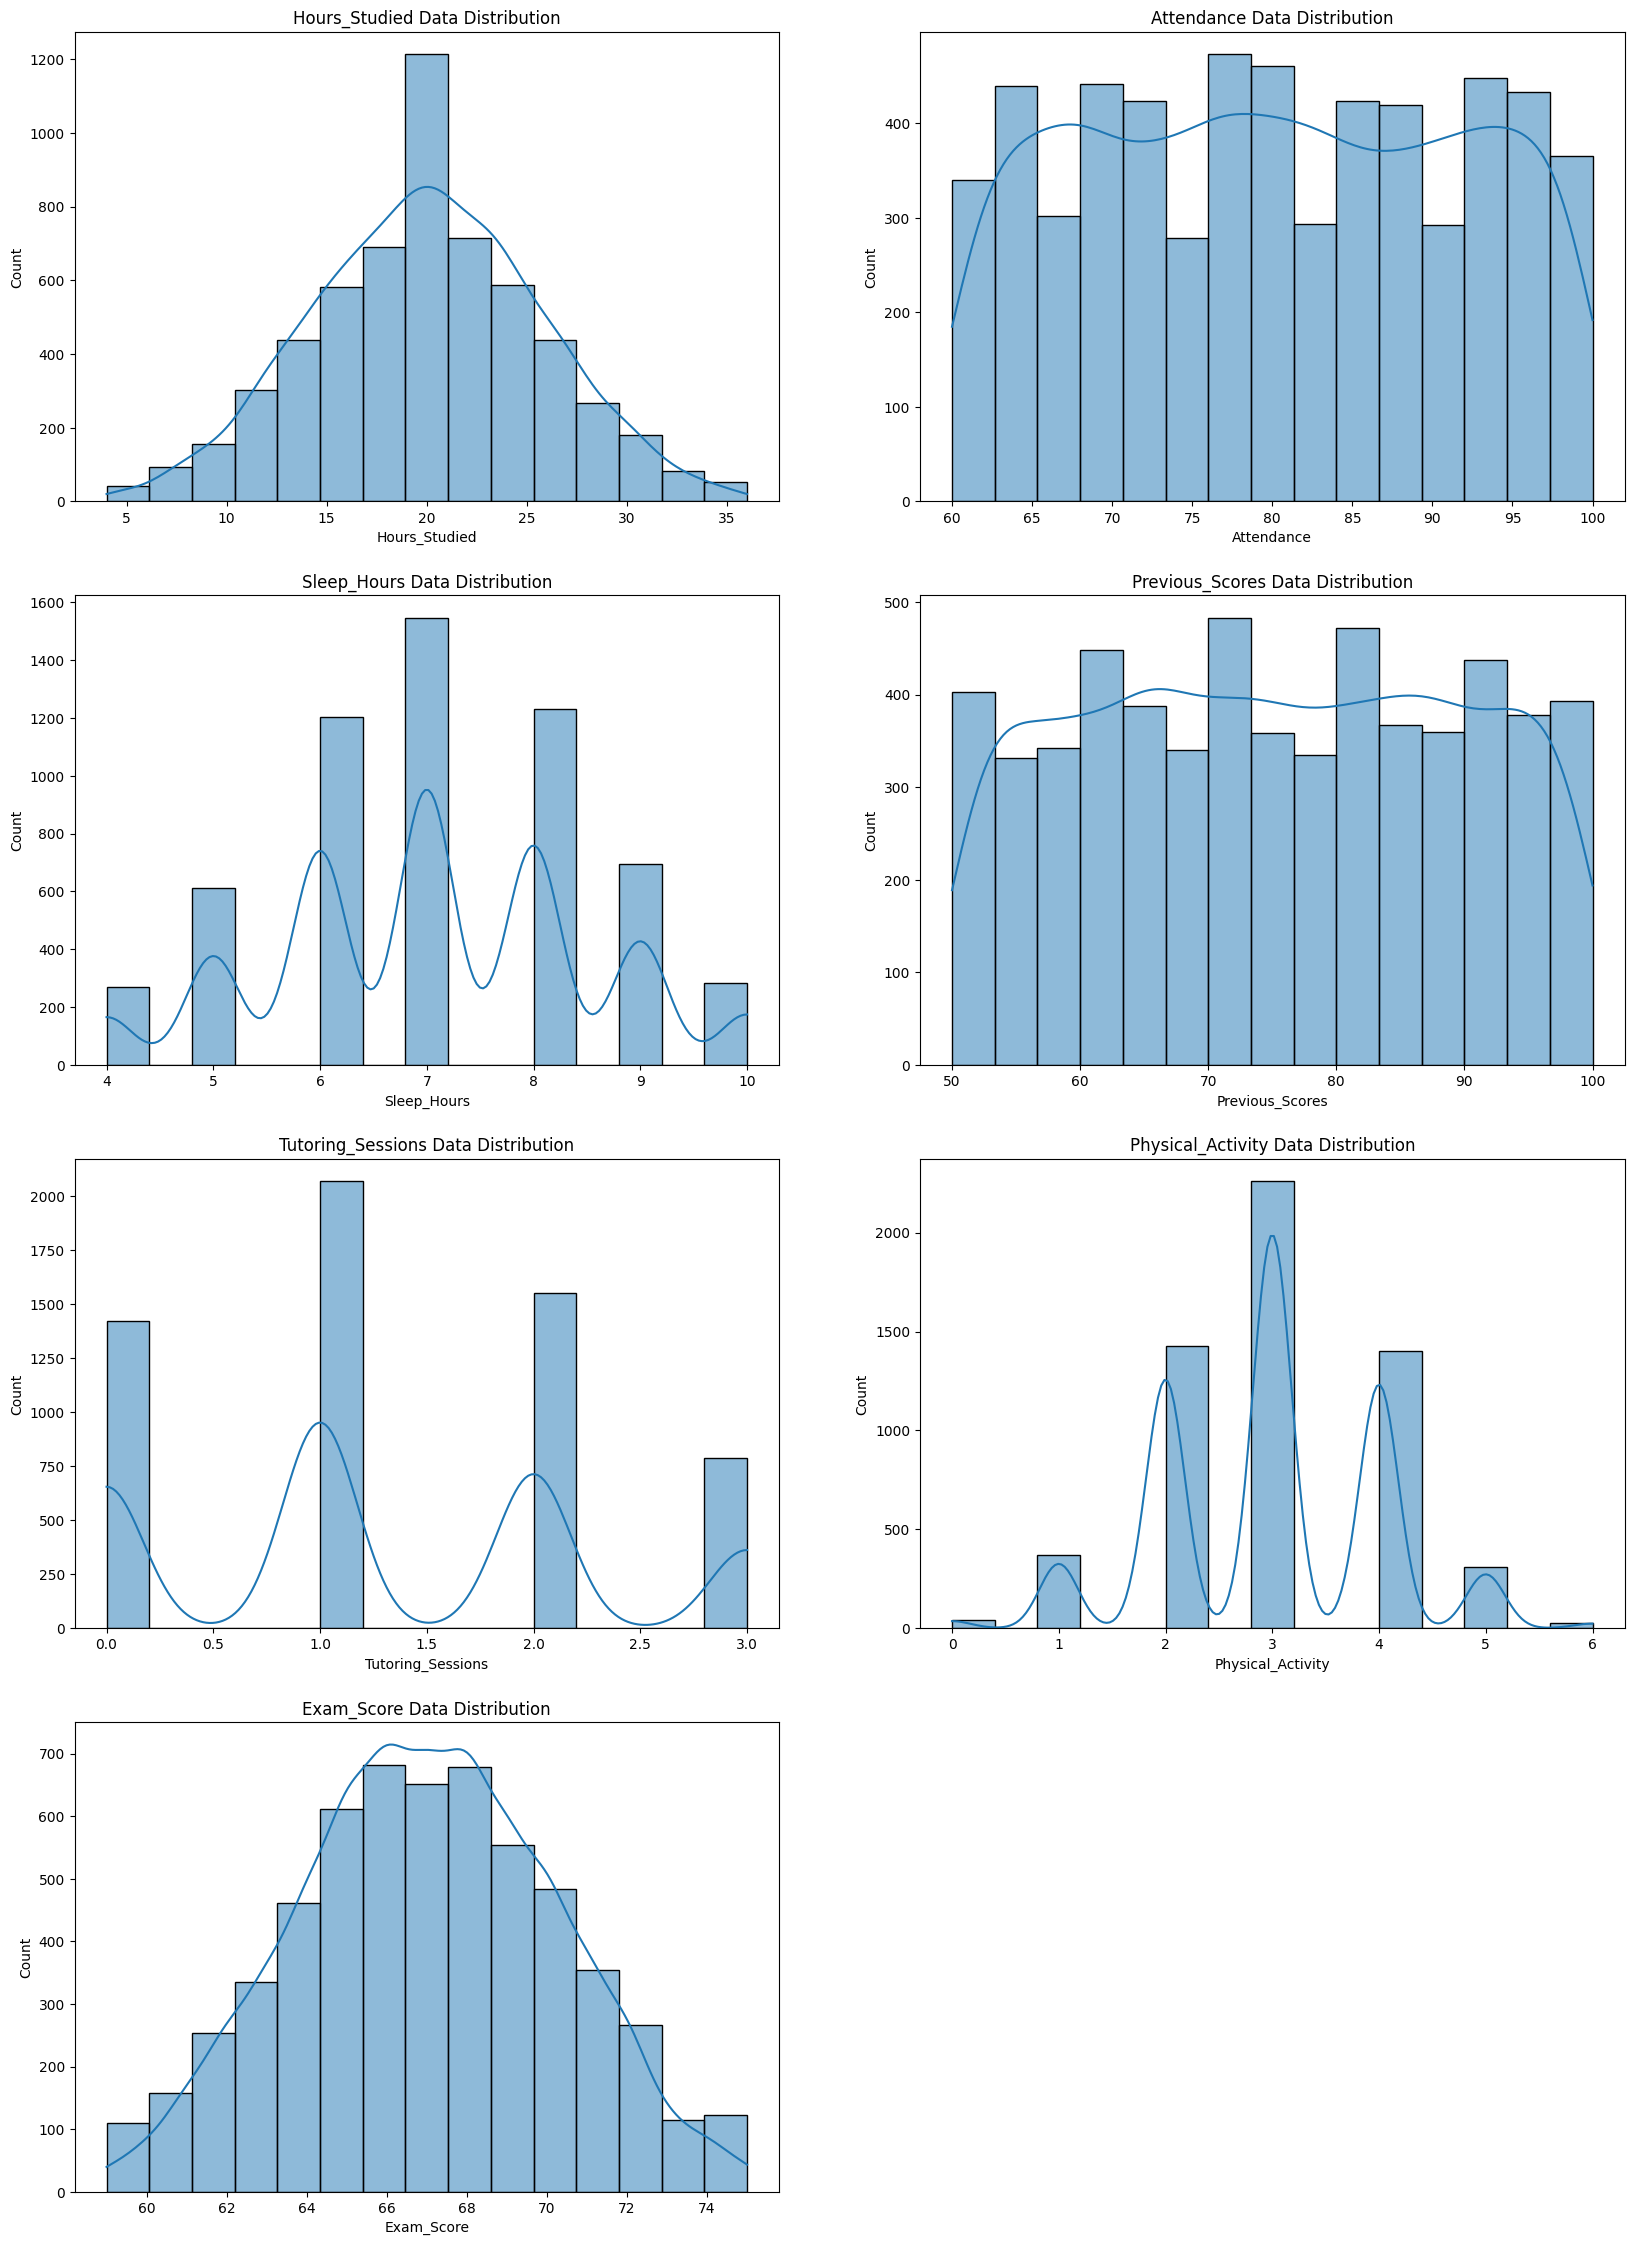

In [19]:
plt.figure(figsize=(20,50))
for i , col in enumerate(numeric_cols):
    plt.subplot(7,2,i+1)
    sns.histplot(df[col] , kde=True , bins=15 , edgecolor='k')
    plt.title(f'{col} Data Distribution')
plt.show()

# **Change categorical data into numerical data by using LabelEncoder**

In [20]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [21]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               5836 non-null   int64
 1   Attendance                  5836 non-null   int64
 2   Parental_Involvement        5836 non-null   int64
 3   Access_to_Resources         5836 non-null   int64
 4   Extracurricular_Activities  5836 non-null   int64
 5   Sleep_Hours                 5836 non-null   int64
 6   Previous_Scores             5836 non-null   int64
 7   Motivation_Level            5836 non-null   int64
 8   Internet_Access             5836 non-null   int64
 9   Tutoring_Sessions           5836 non-null   int64
 10  Family_Income               5836 non-null   int64
 11  Teacher_Quality             5836 non-null   int64
 12  School_Type                 5836 non-null   int64
 13  Peer_Influence              5836 non-null   int64
 14  Physical_Acti

# **Correlation Heatmap**

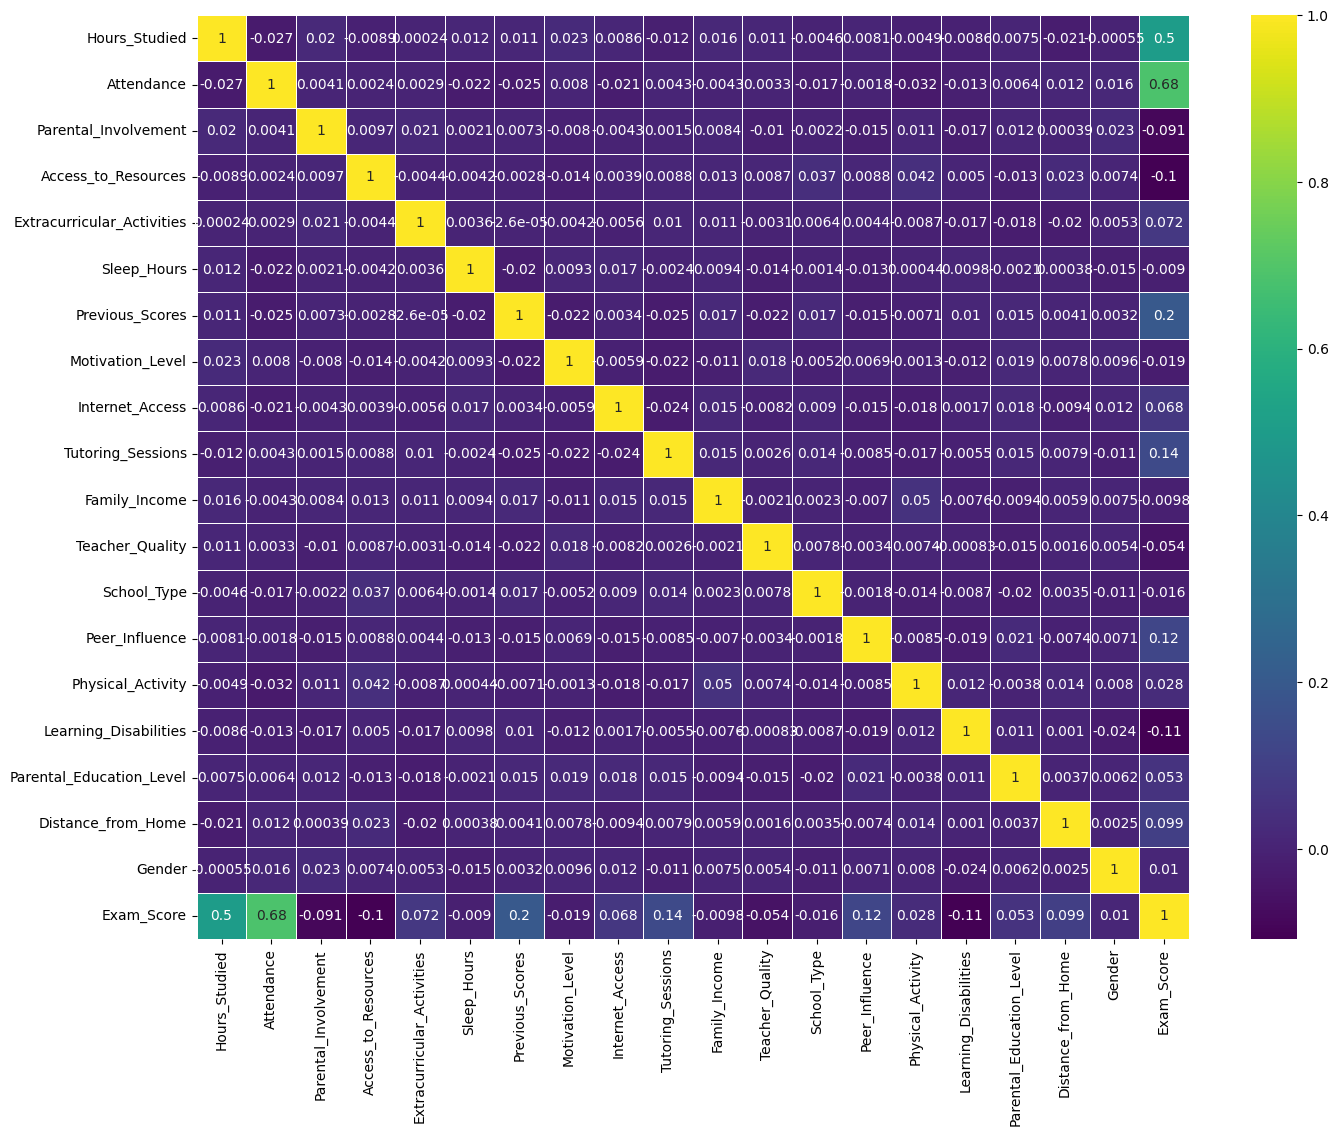

In [23]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

# **Now After change the data type to numerical , i will separate and split the data [80% for training and 20% for testing]**

In [24]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4668, 19)
(1168, 19)
(4668,)
(1168,)


# **Using Linear Regression Algorithm**

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
preds = lr_model.predict(X_test)

In [38]:
print('Mean Squared Error:', mean_squared_error(y_test, preds))
print('R-squared:', r2_score(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

Mean Squared Error: 1.2026032753209686
R-squared: 0.8792451190287593
Root Mean Squared Error: 1.0966326984551247


# **System Prediction**

In [44]:
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

print("\nEnter the values to predict your Score 👨‍🏫:")

user_input = []
for f in features:
    val = float(input(f"{f}: "))
    user_input.append(val)

user_df = pd.DataFrame([user_input], columns=features)
predicted_score = lr_model.predict(user_df)

print(f"\nPredicted Exam Score: {predicted_score[0]:.2f}")


Enter the values to predict your Score 👨‍🏫:
Hours_Studied: 19
Attendance: 64
Parental_Involvement: 1
Access_to_Resources: 2
Extracurricular_Activities: 0
Sleep_Hours: 8
Previous_Scores: 59
Motivation_Level: 1
Internet_Access: 1
Tutoring_Sessions: 2
Family_Income: 2
Teacher_Quality: 2
School_Type: 1
Peer_Influence: 0
Physical_Activity: 4
Learning_Disabilities: 0
Parental_Education_Level: 0
Distance_from_Home: 1
Gender: 0

Predicted Exam Score: 61.83


# **Try Polynomial Regression (Bouns)**

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
pr_model = PolynomialFeatures(degree=2)
X_train_poly = pr_model.fit_transform(X_train)
X_test_poly = pr_model.transform(X_test)

In [87]:
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

LinearRegression()

In [88]:
preds = lr_model.predict(X_test_poly)

In [89]:
print('Mean Squared Error:', mean_squared_error(y_test, preds))
print('R-squared:', r2_score(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

Mean Squared Error: 0.10035287717880068
R-squared: 0.9899234435931389
Root Mean Squared Error: 0.31678522247541896


# **Compare between degrees[1->4]**

Degree1:
Mean Squared Error: 1.2026032753209708
R-squared: 0.8792451190287591
Root Mean Squared Error: 1.0966326984551258

Degree2:
Mean Squared Error: 0.10035287717880068
R-squared: 0.9899234435931389
Root Mean Squared Error: 0.31678522247541896

Degree3:
Mean Squared Error: 0.1497567866215209
R-squared: 0.9849627359959661
Root Mean Squared Error: 0.38698422011953004

Degree4:
Mean Squared Error: 3.467194967868204
R-squared: 0.6518546687499533
Root Mean Squared Error: 1.8620405387284682